<a href="https://colab.research.google.com/github/DevLeoo/florence-airbnb-analysis/blob/main/Floren%C3%A7a_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Florença*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Florença, e ver quais insights podem ser extraídos a partir de dados brutos.**

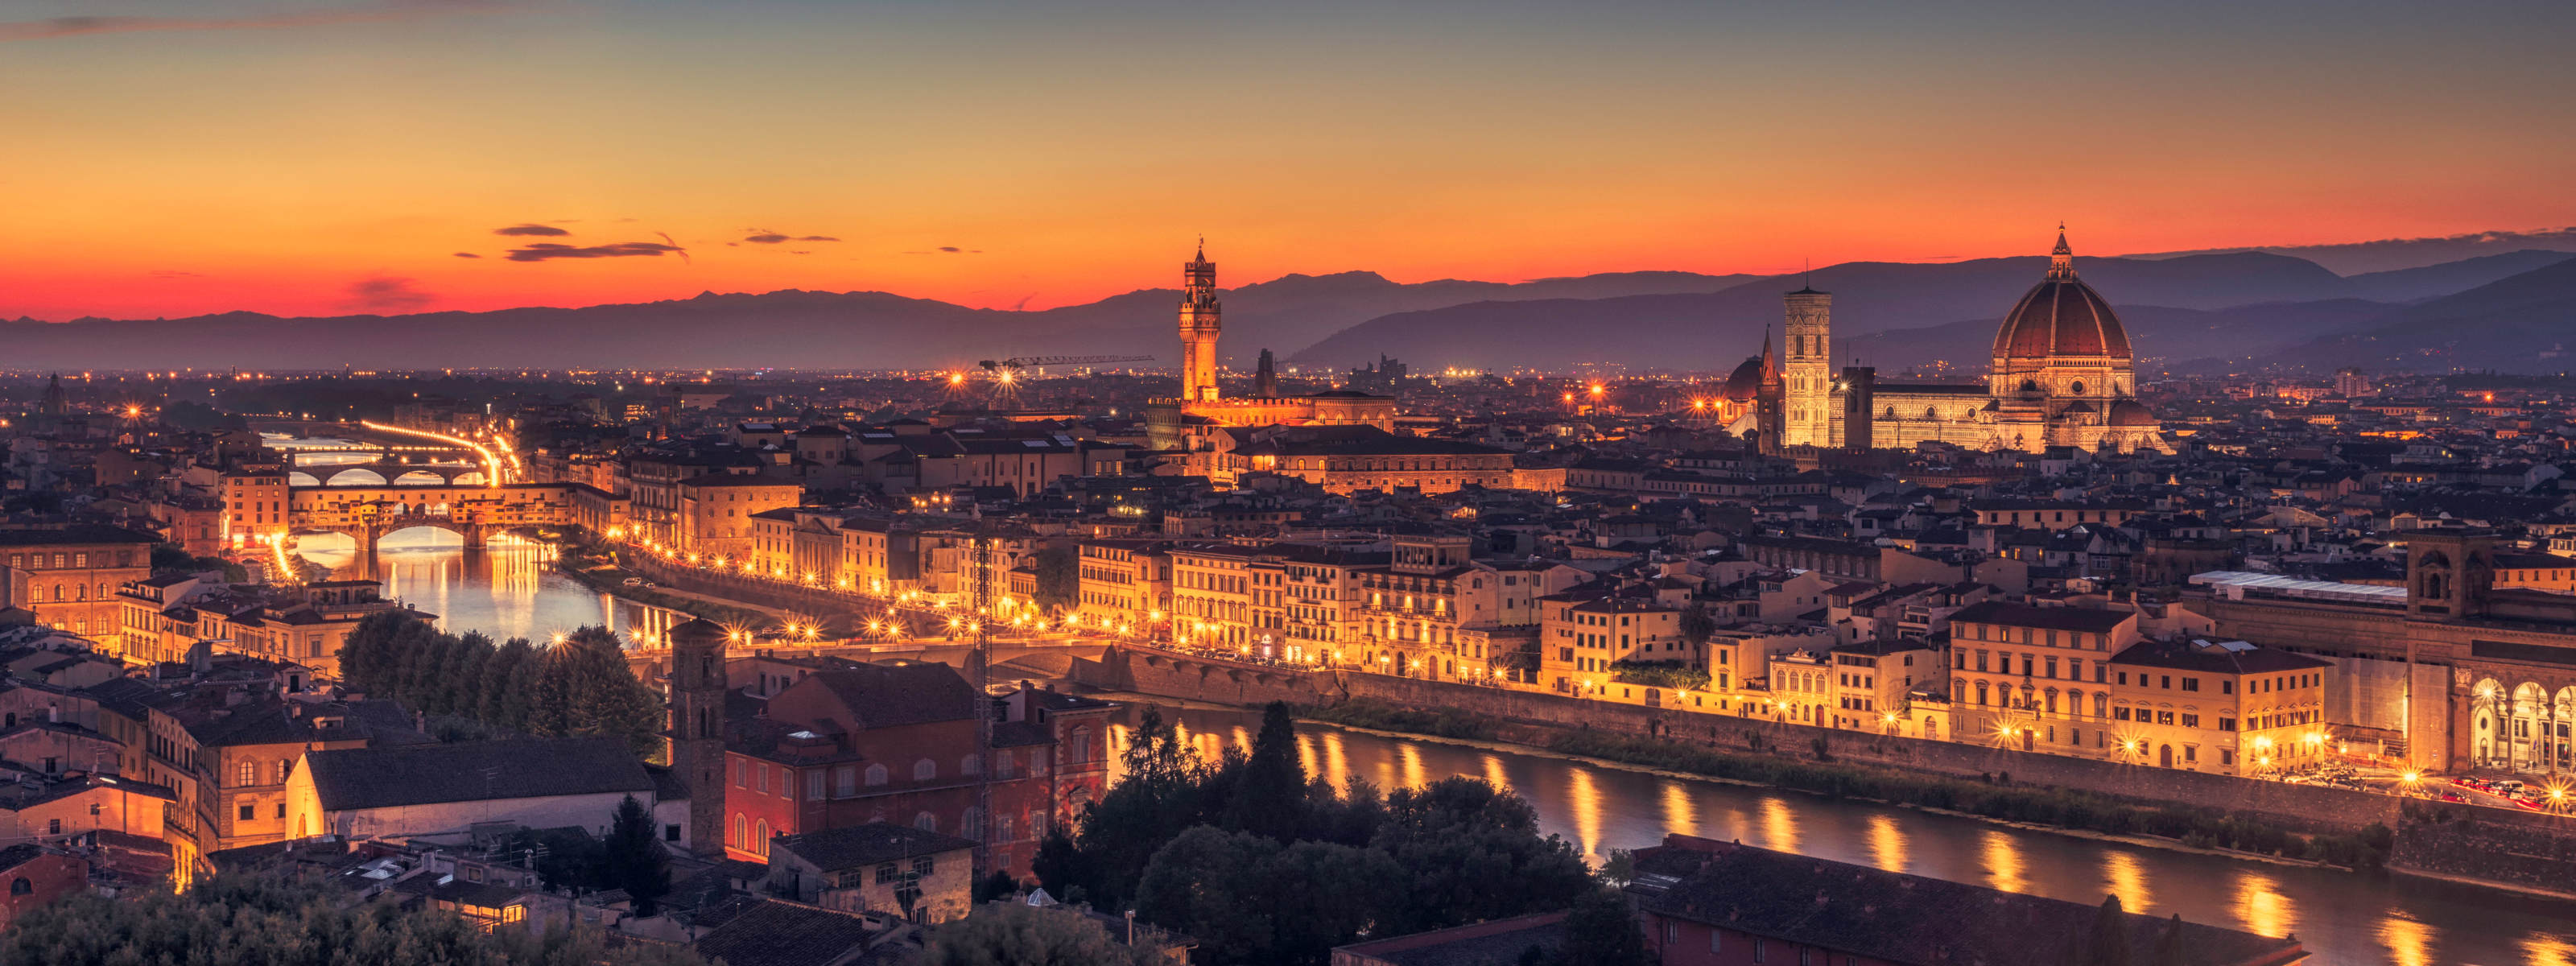

**Florença** é um município italiano, a maior cidade da região da Toscana. 
É considerada o berço do renascentismo italiano além de se destacar como uma das mais bonitas do mundo.Tornou-se célebre também por ser a cidade natal de Dante Alighieri, autor da *Divina Comédia*, considera uma das maiores obras da literatura universal e base da lingua italiana moderna.

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/toscana/florence/2022-06-11/visualisations/listings.csv", index_col="id")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
85820,Salcio room in B&B La Martellina,470473,Claudio,NaN,Campo di Marte,43.76632,11.34166,Private room,104,2,15,2021-08-16,0.16,4,294,1,NaN
20078945,Casa Bonannia O,141678952,Summer In Italy,NaN,Gavinana Galluzzo,43.72672,11.28301,Entire home/apt,195,90,0,NaN,NaN,3,0,0,NaN
24469,Fortezza/City Centre Modern Apt 2+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78210,11.24392,Entire home/apt,80,2,1,2019-09-27,0.03,4,275,0,NaN
463942,BB Casa Schlatter Artist's Atelier. Room #3,2272298,Alessandra,NaN,Campo di Marte,43.78144,11.28003,Private room,70,3,9,2022-05-21,0.09,4,259,2,NaN
182984,"Central, quiet near the Old Bridge",877420,Filippo,NaN,Centro Storico,43.76554,11.25860,Entire home/apt,110,6,12,2022-04-28,0.12,1,232,4,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
display(f"Linhas: {df.shape[0]}")
display(f"Colunas: {df.shape[1]}")
# verificar as 5 primeiras entradas do dataset
df.head()

'Linhas: 10748'

'Colunas: 17'

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
85820,Salcio room in B&B La Martellina,470473,Claudio,NaN,Campo di Marte,43.76632,11.34166,Private room,104,2,15,2021-08-16,0.16,4,294,1,NaN
20078945,Casa Bonannia O,141678952,Summer In Italy,NaN,Gavinana Galluzzo,43.72672,11.28301,Entire home/apt,195,90,0,NaN,NaN,3,0,0,NaN
24469,Fortezza/City Centre Modern Apt 2+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78210,11.24392,Entire home/apt,80,2,1,2019-09-27,0.03,4,275,0,NaN
463942,BB Casa Schlatter Artist's Atelier. Room #3,2272298,Alessandra,NaN,Campo di Marte,43.78144,11.28003,Private room,70,3,9,2022-05-21,0.09,4,259,2,NaN
182984,"Central, quiet near the Old Bridge",877420,Filippo,NaN,Centro Storico,43.76554,11.25860,Entire home/apt,110,6,12,2022-04-28,0.12,1,232,4,NaN


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.919706
last_review                       0.160867
reviews_per_month                 0.160867
name                              0.000186
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
host_id                           0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
neighbourhood                     0.000000
host_name                         0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

In [ ]:
df.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

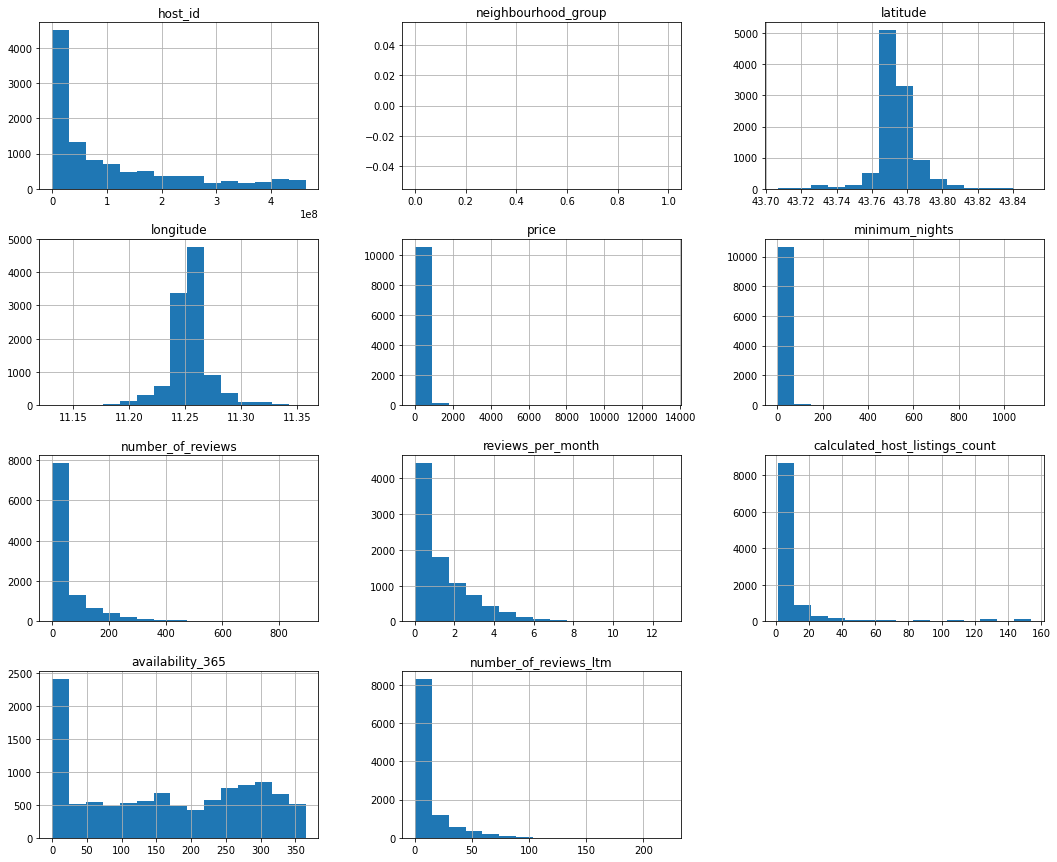

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(18,15));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df.price.mean()

188.05526609601787

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()


# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.087792,-0.080046,-0.061649,0.070992,0.059422
minimum_nights,0.087792,1.000000,-0.029766,-0.046501,-0.017830,0.024735
number_of_reviews,-0.080046,-0.029766,1.000000,0.617060,-0.119198,0.020909
reviews_per_month,-0.061649,-0.046501,0.617060,1.000000,-0.088425,0.116278
calculated_host_listings_count,0.070992,-0.017830,-0.119198,-0.088425,1.000000,0.020067
availability_365,0.059422,0.024735,0.020909,0.116278,0.020067,1.000000


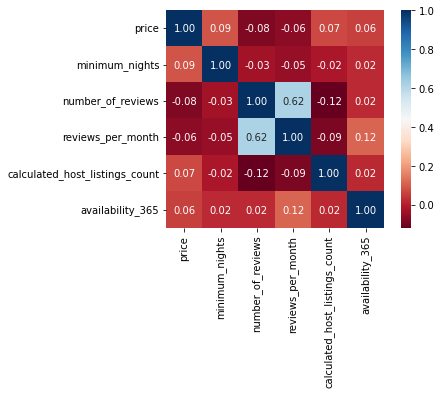

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    8370
Private room       2168
Hotel room          172
Shared room          38
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0] * 100

Entire home/apt    77.874953
Private room       20.171195
Hotel room          1.600298
Shared room         0.353554
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df.groupby('neighbourhood').price.mean()

neighbourhood
Campo di Marte       168.154181
Centro Storico       199.790106
Gavinana Galluzzo    225.850174
Isolotto Legnaia     105.820128
Rifredi              125.270502
Name: price, dtype: float64

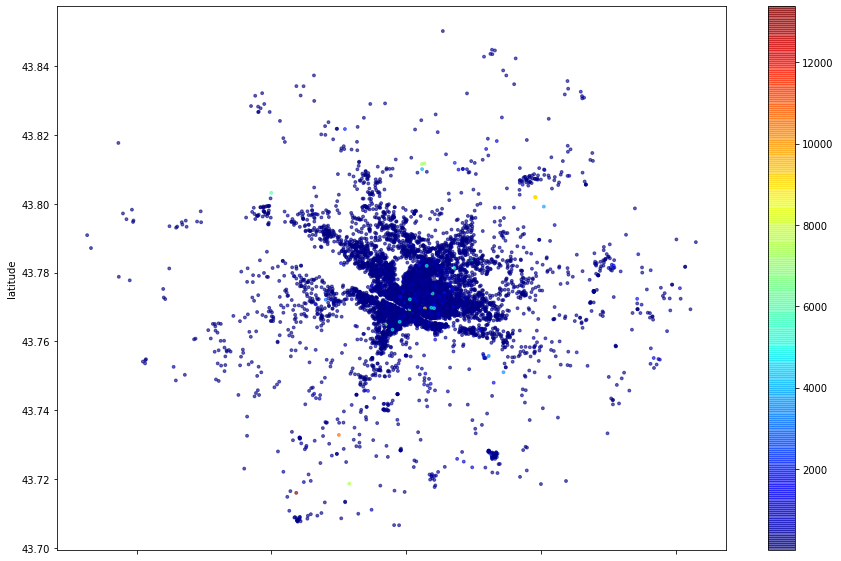

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot.scatter(x='longitude', y='latitude', alpha=0.6, c=df['price'], 
        s=8, figsize=(15,10), cmap=plt.get_cmap('jet'));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
mean = "{:.5f}".format(df.minimum_nights.mean())
display(float(mean))

4.48418

### **Média de preço por tipo de acomodação**

In [50]:
# ver a quantidade maxima, minima e a media de preço por tipo de quarto
price_statistic = df.groupby("room_type")["price"].aggregate(['max', 'min', 'mean'])

# formatar decimais para duas casas

price_statistic.loc[:, 'mean']= price_statistic["mean"].apply(lambda x: round(x, 2))
price_statistic

pandas.core.frame.DataFrame

,max,min,mean
room_type,,,
Entire home/apt,13375,15,200.07
Hotel room,3814,39,287.41
Private room,9000,10,134.73
Shared room,3000,9,133.87


## Conclusões


Com base na análise dos dados do **Airbnb**, observando os histogramas gerados é possivel detectar a presença de outliers em algumas variáveis, exemplo: `minimun_nights`, `calculated_host_listings_count`, `price`.

Observa-se que  há uma certa dispersão dos imóveis pela região.